In [192]:
import matplotlib.pyplot as plt
import matplotlib
import os
import pandas as pd
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot')
import datetime
import locale
import time
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

'es_ES.UTF-8'

In [193]:
product = 'tomate'
tipo = 'prices'

In [194]:
os.chdir('/Volumes/Macintosh HD/_GitHub/journey-of-food/data/producto/'+product+'/prices')
files = os.listdir()
files

['comparativa_precio.png',
 'comparativa_precio_tomate.csv',
 'precio_clean.csv',
 'PRECIO_TOMATE.xlsx',
 'PRECIO_TOMATE_2006-2017.xlsx',
 'PRECIO_TOMATE_2016.csv']

In [195]:
data = pd.read_csv('PRECIO_TOMATE_2016.csv', encoding = 'latin1', delimiter=';')

In [196]:
data

,YEAR,TIPO,PRODUCT,UNIT,ANUAL,S 1,S 2,S 3,S 4,S 5,...,S 43,S 44,S 45,S 46,S 47,S 48,S 49,S 50,S 51,S 52
0,2016,ORIGEN,Tomate redondo liso,kg,0.51,0.38,0.33,0.32,0.34,0.34,...,0.62,0.56,0.41,0.44,0.54,0.78,0.86,0.67,0.66,0.59
1,2016,MERCASA,Tomate redondo liso,kg,0.98,0.87,0.87,0.88,0.90,0.87,...,1.05,0.97,1.03,0.95,0.96,1.12,1.23,1.20,1.19,1.17
2,2016,DESTINO,Tomate redondo liso,kg,2.03,2.15,2.14,2.12,2.09,2.06,...,2.03,2.03,2.03,2.02,2.03,2.02,2.03,2.11,2.11,2.10
3,2016,MARGEN ORIGEN,Tomate redondo liso,percent,0.25,0.18,0.15,0.15,0.16,0.17,...,0.31,0.28,0.20,0.22,0.27,0.39,0.42,0.32,0.31,0.28
4,2016,MARGEN MERCASA,Tomate redondo liso,percent,0.23,0.23,0.25,0.26,0.27,0.26,...,0.21,0.20,0.30,0.25,0.21,0.17,0.18,0.25,0.25,0.28
5,2016,MARGEN DESTINO,Tomate redondo liso,percent,0.52,0.60,0.59,0.59,0.57,0.58,...,0.48,0.52,0.49,0.53,0.53,0.45,0.40,0.43,0.44,0.44


In [197]:
datos = pd.melt(data, id_vars=['YEAR',
 'TIPO',
 'PRODUCT',
 'UNIT'], value_vars=['S 1',
 'S 2',
 'S 3',
 'S 4',
 'S 5',
 'S 6',
 'S 7',
 'S 8',
 'S 9',
 'S 10',
 'S 11',
 'S 12',
 'S 13',
 'S 14',
 'S 15',
 'S 16',
 'S 17',
 'S 18',
 'S 19',
 'S 20',
 'S 21',
 'S 22',
 'S 23',
 'S 24',
 'S 25',
 'S 26',
 'S 27',
 'S 28',
 'S 29',
 'S 30',
 'S 31',
 'S 32',
 'S 33',
 'S 34',
 'S 35',
 'S 36',
 'S 37',
 'S 38',
 'S 39',
 'S 40',
 'S 41',
 'S 42',
 'S 43',
 'S 44',
 'S 45',
 'S 46',
 'S 47',
 'S 48',
 'S 49',
 'S 50',
 'S 51',
 'S 52'])

In [198]:
datos['variable']=datos['variable'].apply(lambda x: ''.join(x.split(' ')))

In [199]:
datos.YEAR = datos.YEAR.apply(str)

In [200]:
datos['DATE'] = datos[['YEAR', 'variable']].apply(lambda x: ''.join(x), axis=1)

In [201]:
datos.tail()

,YEAR,TIPO,PRODUCT,UNIT,variable,value,DATE
307,2016,MERCASA,Tomate redondo liso,kg,S52,1.17,2016S52
308,2016,DESTINO,Tomate redondo liso,kg,S52,2.10,2016S52
309,2016,MARGEN ORIGEN,Tomate redondo liso,percent,S52,0.28,2016S52
310,2016,MARGEN MERCASA,Tomate redondo liso,percent,S52,0.28,2016S52
311,2016,MARGEN DESTINO,Tomate redondo liso,percent,S52,0.44,2016S52


In [202]:
datos.DATE = datos.DATE.apply(lambda x: datetime.datetime.strptime(x+ '-1', "%YS%W-%w"))

In [203]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
YEAR        312 non-null object
TIPO        312 non-null object
PRODUCT     312 non-null object
UNIT        312 non-null object
variable    312 non-null object
value       312 non-null float64
DATE        312 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 17.1+ KB


In [204]:
datos.sort_values(by='DATE')
datos.set_index('DATE')


,YEAR,TIPO,PRODUCT,UNIT,variable,value
DATE,,,,,,
2016-01-04,2016,ORIGEN,Tomate redondo liso,kg,S1,0.38
2016-01-04,2016,MERCASA,Tomate redondo liso,kg,S1,0.87
2016-01-04,2016,DESTINO,Tomate redondo liso,kg,S1,2.15
2016-01-04,2016,MARGEN ORIGEN,Tomate redondo liso,percent,S1,0.18
2016-01-04,2016,MARGEN MERCASA,Tomate redondo liso,percent,S1,0.23
2016-01-04,2016,MARGEN DESTINO,Tomate redondo liso,percent,S1,0.60
2016-01-11,2016,ORIGEN,Tomate redondo liso,kg,S2,0.33
2016-01-11,2016,MERCASA,Tomate redondo liso,kg,S2,0.87
2016-01-11,2016,DESTINO,Tomate redondo liso,kg,S2,2.14


In [205]:
datos.to_csv('precio_clean.csv', encoding='utf-8')

In [229]:
datos = pd.read_csv('precio_clean.csv', encoding='utf-8', parse_dates=['DATE'],index_col=['DATE'])

In [230]:
datos.head()

,Unnamed: 0,YEAR,TIPO,PRODUCT,UNIT,variable,value
DATE,,,,,,,
2016-01-04,0,2016,ORIGEN,Tomate redondo liso,kg,S1,0.38
2016-01-04,1,2016,MERCASA,Tomate redondo liso,kg,S1,0.87
2016-01-04,2,2016,DESTINO,Tomate redondo liso,kg,S1,2.15
2016-01-04,3,2016,MARGEN ORIGEN,Tomate redondo liso,percent,S1,0.18
2016-01-04,4,2016,MARGEN MERCASA,Tomate redondo liso,percent,S1,0.23


In [231]:
a = datos.loc[datos['TIPO']=='MARGEN ORIGEN'].value
b = datos.loc[datos['TIPO']=='MARGEN MERCASA'].value
c = datos.loc[datos['TIPO']=='MARGEN DESTINO'].value
result = pd.concat([a, b, c], axis=1)

In [232]:
result.columns = ['ORIGEN','MERCASA','DESTINO']
result.dropna(inplace=True)

In [233]:
result.sort_index(inplace=True)

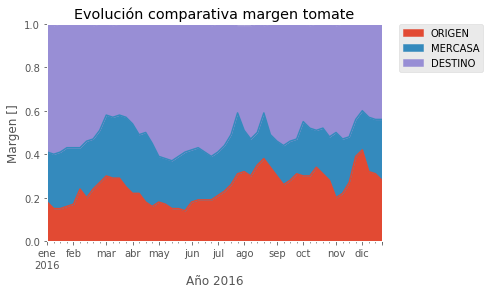

In [234]:
result.plot.area(stacked = True)
plt.title('Evolución comparativa margen tomate')
plt.ylabel('Margen []')
plt.xlabel('Año 2016')
plt.ylim([0,1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('comparativa_precio_margen.png')

In [235]:
result.to_csv('comparativa_precio_tomate_margen')

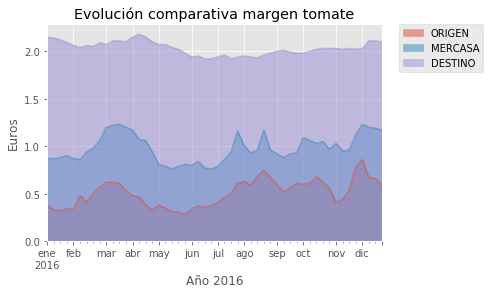

In [236]:
a = datos.loc[datos['TIPO']=='ORIGEN'].value
b = datos.loc[datos['TIPO']=='MERCASA'].value
c = datos.loc[datos['TIPO']=='DESTINO'].value
result = pd.concat([a, b, c], axis=1)
result.columns = ['ORIGEN','MERCASA','DESTINO']
result.dropna(inplace=True)
result.sort_index(inplace=True)

result.plot.area(stacked = False)
plt.title('Evolución comparativa margen tomate')
plt.ylabel('Euros')
plt.xlabel('Año 2016')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('comparativa_precio')

In [237]:
data = pd.read_csv('comparativa_precio_tomate.csv', encoding='utf-8', parse_dates=['DATE'])